In [1]:
import pydicom
import os
import numpy
from natsort import natsorted
from matplotlib import pyplot, cm
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [13]:
PathDicom = "../_data/dicom/dcm/000"
lstFilesDCM = []
for dirName, subdirList, fileList in os.walk(PathDicom):
    print(fileList)
    for filename in natsorted(fileList):
        if ".dcm" in filename.lower():
            lstFilesDCM.append(os.path.join(dirName, filename))

['export336.dcm', 'export450.dcm', 'export444.dcm', 'export322.dcm', 'export108.dcm', 'export134.dcm', 'export120.dcm', 'export28.dcm', 'export14.dcm', 'export242.dcm', 'export256.dcm', 'export281.dcm', 'export295.dcm', 'export294.dcm', 'export280.dcm', 'export257.dcm', 'export243.dcm', 'export15.dcm', 'export29.dcm', 'export121.dcm', 'export135.dcm', 'export109.dcm', 'export445.dcm', 'export323.dcm', 'export337.dcm', 'export451.dcm', 'export309.dcm', 'export321.dcm', 'export447.dcm', 'export453.dcm', 'export335.dcm', 'export123.dcm', 'export137.dcm', 'export17.dcm', 'export269.dcm', 'export255.dcm', 'export241.dcm', 'export296.dcm', 'export282.dcm', 'export283.dcm', 'export297.dcm', 'export240.dcm', 'export254.dcm', 'export268.dcm', 'export16.dcm', 'export136.dcm', 'export122.dcm', 'DICOMDIR', 'export452.dcm', 'export334.dcm', 'export320.dcm', 'export446.dcm', 'export308.dcm', 'export442.dcm', 'export324.dcm', 'export330.dcm', 'export456.dcm', 'export318.dcm', 'export126.dcm', 'export

In [14]:
RefDs = pydicom.read_file(lstFilesDCM[0])
ConstPixelDims = (int(RefDs.Rows), int(RefDs.Columns), len(lstFilesDCM))
ConstPixelSpacing = (float(RefDs.PixelSpacing[0]), float(RefDs.PixelSpacing[1]), float(RefDs.SliceThickness))

In [15]:
print(RefDs)

(0008, 0005) Specific Character Set              CS: 'ISO_IR 192'
(0008, 0008) Image Type                          CS: ['DERIVED', 'PRIMARY', 'AXIAL']
(0008, 0012) Instance Creation Date              DA: '20170801'
(0008, 0013) Instance Creation Time              TM: '102618'
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.250.1.90.2.709154157.20170801102618.14140.16919.1
(0008, 0020) Study Date                          DA: '20170531'
(0008, 0021) Series Date                         DA: '20170801'
(0008, 0022) Acquisition Date                    DA: '20170531'
(0008, 0023) Content Date                        DA: '20170801'
(0008, 0030) Study Time                          TM: '092132'
(0008, 0031) Series Time                         TM: '102618'
(0008, 0032) Acquisition Time                    TM: '092431'
(0008, 0033) Content Time                        TM: '102618'
(0008, 0050) Accession Number             

In [13]:
print(ConstPixelDims)

(640, 640, 168)


In [14]:
print(ConstPixelSpacing)

(0.25, 0.25, 0.25)


In [15]:
x = numpy.arange(0.0, (ConstPixelDims[0]+1)*ConstPixelSpacing[0], ConstPixelSpacing[0])
y = numpy.arange(0.0, (ConstPixelDims[1]+1)*ConstPixelSpacing[1], ConstPixelSpacing[1])
z = numpy.arange(0.0, (ConstPixelDims[2]+1)*ConstPixelSpacing[2], ConstPixelSpacing[2])

In [16]:
ArrayDicom = numpy.zeros(ConstPixelDims, dtype=RefDs.pixel_array.dtype)
for filenameDCM in lstFilesDCM:
    ds = pydicom.read_file(filenameDCM)
    ArrayDicom[:, :, lstFilesDCM.index(filenameDCM)] = ds.pixel_array

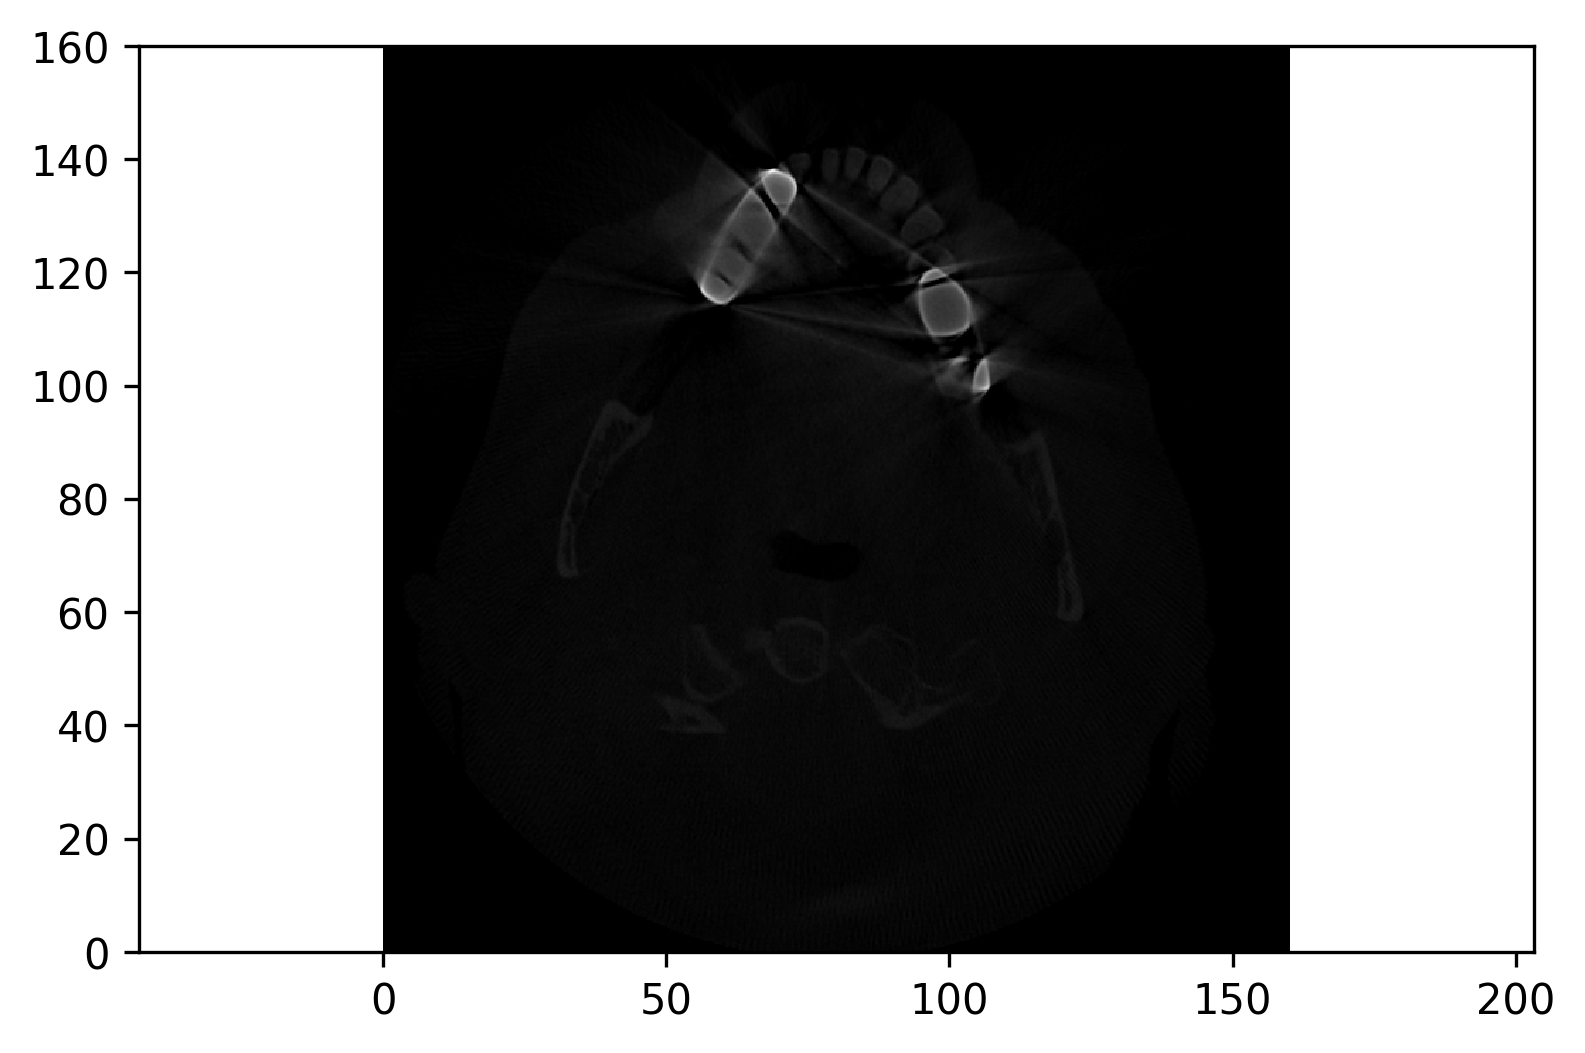

In [32]:
pyplot.figure(dpi=300)
pyplot.axes().set_aspect('equal', 'datalim')
pyplot.set_cmap(pyplot.gray())
pyplot.pcolormesh(x, y, numpy.flipud(ArrayDicom[:, :, 24]))